<a href="https://colab.research.google.com/github/lokkyX3/Lending-Club-Analysis-Project/blob/main/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading packages and data 

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NN and DL Udemy/DATA/lending_club_loan_two.csv')

What kind of features we had in this dataset?

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Note: For the decriptions of the features, please refer to Read Me.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


Since this is a classification problem, we should find out distribution of the label feature.

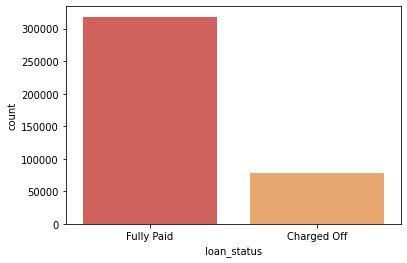

In [ ]:
sns.countplot(x='loan_status',data=df)

Note: This is a highly unbalanced dataset as there are alot more 'Fully Paid' than 'Charged Off' entries 

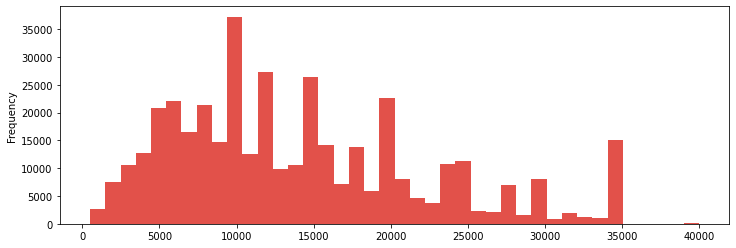

In [ ]:
plt.figure(figsize=(12, 4))
df['loan_amnt'].plot.hist(bins=40)


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

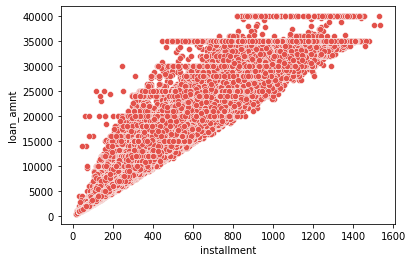

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

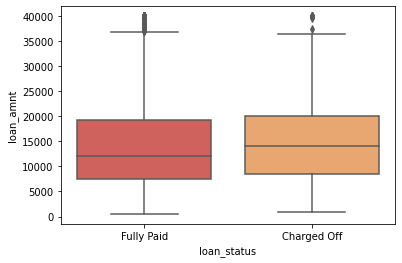

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df[['loan_amnt','loan_status']].groupby('loan_status').describe()

loan_amnt                             ...                           
                count          mean          std  ...      50%      75%      max
loan_status                                       ...                           
Charged Off   77673.0  15126.300967  8505.090557  ...  14000.0  20000.0  40000.0
Fully Paid   318357.0  13866.878771  8302.319699  ...  12000.0  19225.0  40000.0

[2 rows x 8 columns]

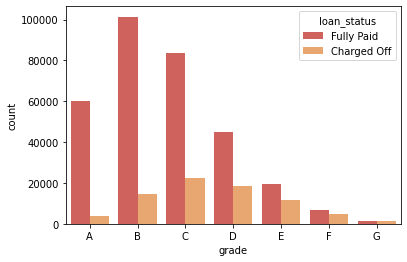

In [ ]:
sns.countplot(x='grade',hue='loan_status',data=df.sort_values(by='grade'))

In [ ]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "12pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "20pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '25pt')])]
            
df_bar=df[['loan_status','grade']].groupby('grade')['loan_status'].value_counts().reset_index(name='count')
df_bar.style.bar(subset='count').hide_index().highlight_max(subset='loan_status',color='#676967').set_table_styles(magnify())

grade,loan_status,count
A,Fully Paid,60151
A,Charged Off,4036
B,Fully Paid,101431
B,Charged Off,14587
C,Fully Paid,83538
C,Charged Off,22449
D,Fully Paid,45186
D,Charged Off,18338
E,Fully Paid,19723
E,Charged Off,11765


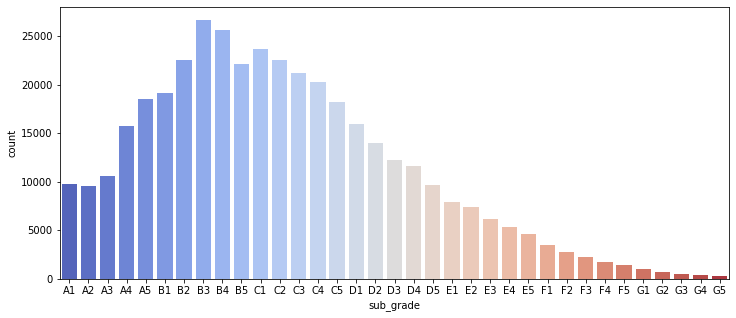

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',data=df.sort_values(by='sub_grade'),palette='coolwarm')

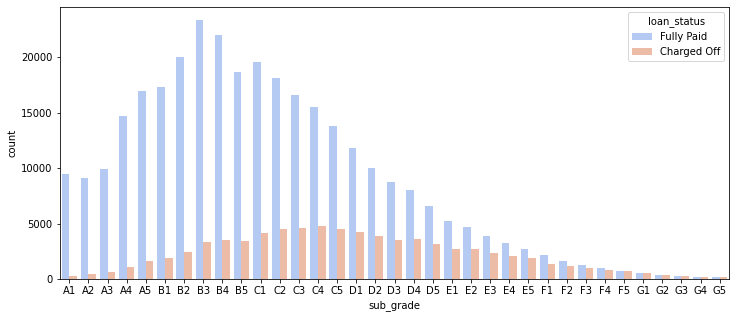

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',hue='loan_status',data=df.sort_values(by='sub_grade'),palette='coolwarm')

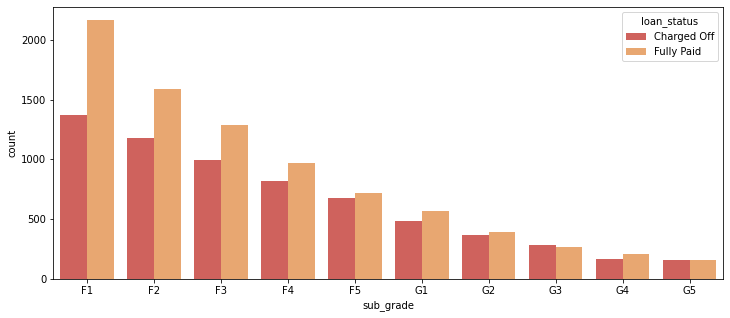

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',hue='loan_status',data=df[df.sub_grade.str.contains('F')|df.sub_grade.str.contains('G')].sort_values(by='sub_grade'))

In [ ]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [ ]:
df[['loan_repaid','loan_status']]

In [ ]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')